# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [84]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Gather the html from the current page in the browser
html = browser.html

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Extract all rows of data
table = soup.find('table', class_='table')

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Find the header
header_all = table.find_all('th')

# Create an empty list to save the table's header
header_re = []

# Strip the table's header
for headers in header_all:

    title = headers.text

    header_re.append(title)

# Add the table's header to the DataFrame
df = pd.DataFrame(columns=header_re)

In [9]:
# Find the table's data 
for row in table.find_all('tr',class_='data-row'):

        data = row.find_all('td')

        # Strip the data
        data_re = [td.text.strip() for td in data]

        # Add the table's data to DataFrame
        df.loc[len(df)] = data_re

In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
# Close the browser now
# Because the data has been saved to the DataFrame
browser.quit()

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [14]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
months = df['month'].value_counts().sort_index(ascending=True)
months

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [68]:
# 2. How many Martian days' worth of data are there?
days = df['sol'].nunique()
days

1867

In [67]:
# 3. What is the average low temperature by month?
# The total months exist on Mars
total_months = df['month'].nunique()

# Create an empty list to save the result
avg_low_temp = []

# Loop through the data to find the average low temperature for each month
for i in range(1, total_months + 1, 1):

    # Create a dictionary to save the result
    temp_per_month={"month":"", "avg_low_temp":""}

    # Find the average low temp in each month
    avg_low_temp_month = df.loc[df['month']==i]['min_temp'].mean()

    # Add the result to the dictionary
    temp_per_month["month"] = i
    temp_per_month["avg_low_temp"] = avg_low_temp_month

    avg_low_temp.append(temp_per_month)    

# Create a DataFrame to save the result
avg_low_temp_df = pd.DataFrame(avg_low_temp, columns=["month", "avg_low_temp"])
avg_low_temp_df

,month,avg_low_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


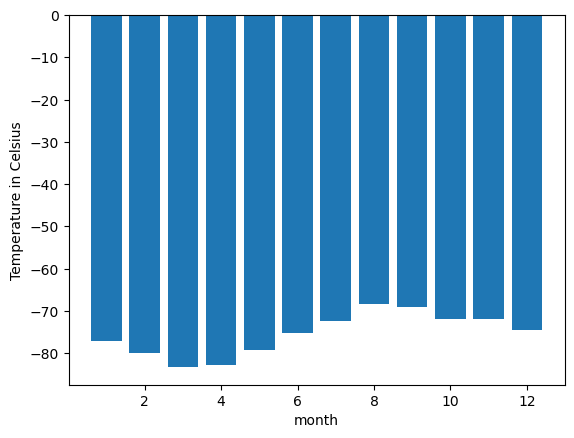

In [63]:
# Plot the average temperature by month
plt.bar(avg_low_temp_df['month'], avg_low_temp_df["avg_low_temp"])
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

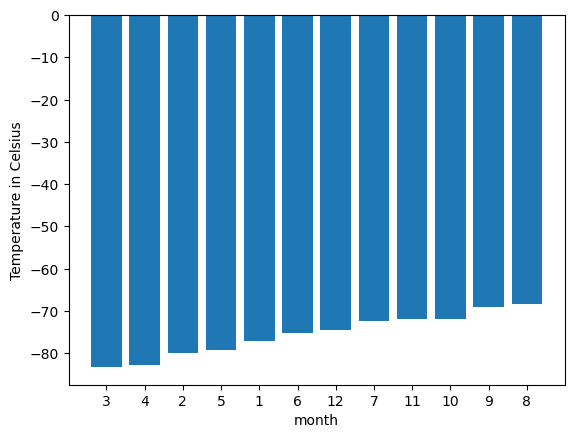

In [64]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the DataFrame
avg_low_temp_df = pd.DataFrame(avg_low_temp_df.sort_values(by=['avg_low_temp']))
avg_low_temp_df_sort = avg_low_temp_df.reset_index(drop=True)

# Plot the result
x_axis = np.arange(len(avg_low_temp_df_sort['month']))
plt.bar(x_axis, avg_low_temp_df_sort["avg_low_temp"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, avg_low_temp_df_sort['month'])
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

In [70]:
# 4. Average pressure by Martian month
per_month = df.groupby('month')
pressure_month = per_month.mean().loc[:,['pressure']]
pressure_month

C:\Users\jhyan\AppData\Local\Temp\ipykernel_2180\1450000949.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pressure_month = per_month.mean().loc[:,['pressure']]


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0, 0.5, 'Atmospheric Pressure')

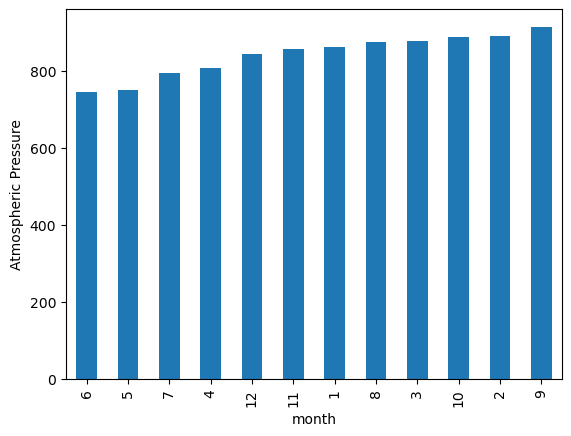

In [83]:
# Plot the average pressure by month
# y_axis = pressure_month['pressure'].sort_values(ascending=True)
# plt.bar(pressure_month['month'], y_axis)

# Sort the DataFrame
pressure_month_sort = pd.DataFrame(pressure_month.sort_values(by=['pressure']))

# Plot the result
barplt = pressure_month_sort['pressure'].plot.bar()
barplt.set_xlabel("month")
barplt.set_ylabel("Atmospheric Pressure")

In [85]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Find the original Sun longitude
orig_long = df['ls'].loc[0]

# Find the Sun longitude which is same to the origin one
long_all = df.loc[df['ls']==orig_long]

# Calculate days in a martian year
one_martial_year = long_all['terrestrial_date'].loc[0]
after_one_martial_year = long_all['terrestrial_date'].iloc[1]
martial_year = after_one_martial_year - one_martial_year

# Print the result
print("In one Martial year, nearly ", martial_year, "pass on Earth")

In one Martial year, nearly  686 days 00:00:00 pass on Earth


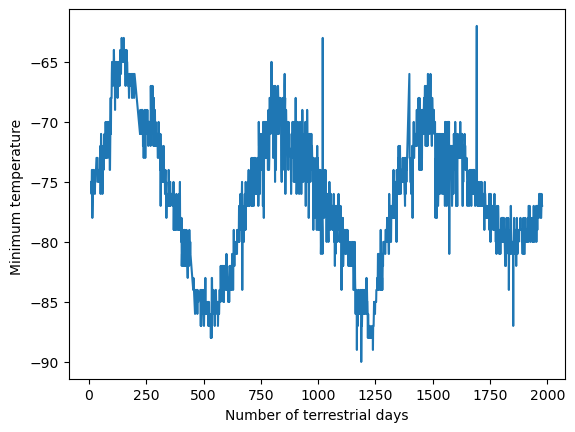

In [87]:
# Plot the minimum temperature vs Martian Days 
plt.plot(df['sol'],df['min_temp'])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature ")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [88]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)